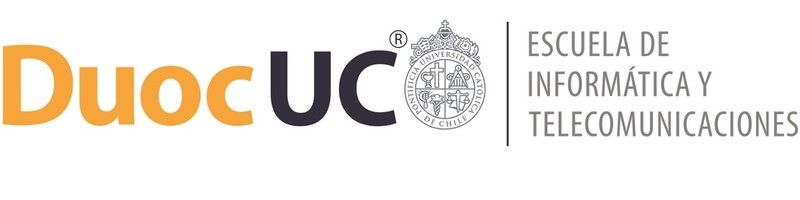

# Metodologia CRISP en Notebook


# Caso E.T

CONTEXTO CASO




El banco Monopoly lleva muchos años atendiendo a sus clientes en Chile y recientemente
ha sido adquirido por un Banco con capitales extranjeros llamado “Dormammu”.
Dormammu ha encargado a sus ingenieros hacer estudios sobre los clientes del banco
Monopoly, para conocer su comportamiento y detectar patrones. Además, debe analizar
cómo será su estrategia para abordar estos nuevos clientes dado el uso que ellos hacen de
sus productos financieros.
Los ingenieros del área informática del banco Monopoly han extraído una base de datos
según una solicitud recibida por el nuevo dueño del banco y la han compartido con los
ingenieros de Dormammu que están en la sede de New York. La base contiene una muestra
de clientes con 12 meses de información almacenada en variables mensuales por cada
cliente.
Usted es parte del equipo de ingenieros del banco Dormammu, y con sus colegas debe
analizar esta base, limpiarla, seleccionar las variables que sirvan para alguna interpretación
y entregar la mayor información posible a los dueños de este banco para que puedan
conocer a los clientes, preparar una estrategia y abordar a este nuevo mercado.
La base de datos tiene variables asociadas a información del cliente y variables mensuales,
es decir una por cada mes, el cliente no se repite y las variables asociadas se van agregando
como una columna más. Con esto, la base de datos tiene 574 variables y 51.124 registros.

La descripción de las variables se muestra a continuación:


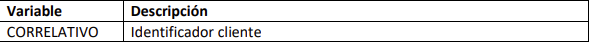

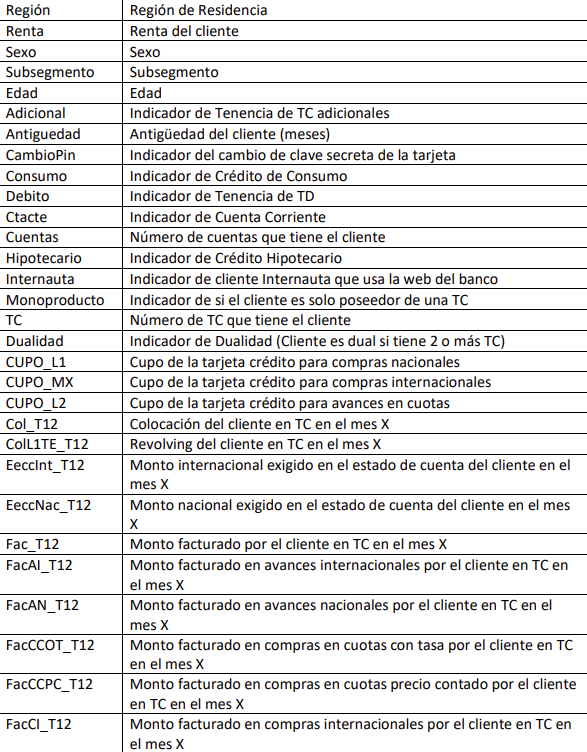

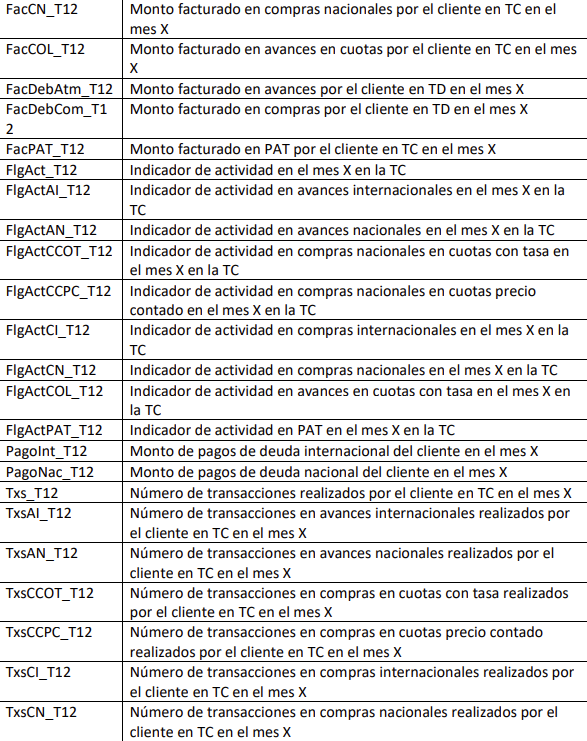

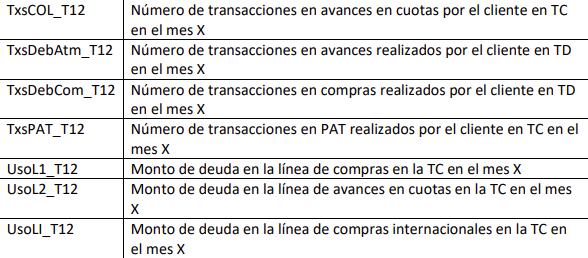

## Fase 1: Business Understanding

In [14]:
# Insertar cuantos bloques de código y markdown consideren necesarios
# Se recomienda investigar sobre el contexto de tema del dataset, sobre los datos, uso de los campos en estadísticas,
# ver en qué se relacionan los contenidos.

#### Contexto del Negocio

El banco "Dormammu" ha adquirido al banco chileno "Monopoly" y busca integrar a sus nuevos clientes de manera efectiva mientras optimiza su estrategia de negocio. El objetivo principal es comprender a los clientes de "Monopoly" para detectar patrones en su comportamiento financiero, identificar oportunidades de crecimiento (como cross-selling de productos financieros) y minimizar el riesgo (como la morosidad o el abandono de clientes). El banco "Dormammu" desea usar los datos históricos de 12 meses de actividad financiera de estos clientes para diseñar estrategias de marketing dirigidas, mejorar la retención de clientes y maximizar la rentabilidad.

#### Preguntas de Negocio

1. ¿Cuáles son los segmentos de clientes más rentables y cuáles presentan mayores riesgos financieros?
2. ¿Qué patrones de uso de productos financieros se observan entre los clientes de "Monopoly"?
3. ¿Qué características de los clientes están más asociadas con la alta rentabilidad o el alto riesgo?
4. ¿Cómo se pueden diseñar campañas de marketing más efectivas basadas en el comportamiento y características de los clientes?

### 3. Hipótesis del Negocio

Las hipótesis del negocio se formulan para guiar el análisis de datos y los modelos predictivos, asegurando que el enfoque esté alineado con los objetivos estratégicos del banco "Dormammu".

#### 3.1 Tareas de Regresión

**Hipótesis:**

- Los ingresos del cliente ("Renta") y su antigüedad con el banco están positivamente correlacionados con el monto total gastado en productos financieros (como tarjetas de crédito) a lo largo de los 12 meses.
- El uso promedio de la línea de crédito (cupo de TC y avances en cuotas) puede predecir el monto facturado por el cliente en los próximos meses.

**Tareas de Regresión:**

1. **Predecir el Monto de Gasto Futuro:**
   - Utilizar técnicas de regresión para predecir el monto que un cliente gastará en productos financieros (como tarjetas de crédito, créditos de consumo, etc.) en los próximos meses, basado en su comportamiento financiero pasado.

2. **Estimar la Probabilidad de Pago:**
   - Modelar la relación entre el comportamiento de pago del cliente (historial de pagos, deuda acumulada) y su probabilidad de mantenerse al día con sus obligaciones financieras en los próximos 3 a 6 meses.

#### 3.2 Tareas de Clasificación

**Hipótesis:**

- Los clientes con múltiples tarjetas de crédito y líneas de crédito abiertas tienen un mayor riesgo de impago.
- Los clientes que usan frecuentemente los servicios digitales del banco (clientes internautas) son menos propensos a cambiar de banco o abandonar el uso de productos financieros.
- Ciertos segmentos de clientes (por ejemplo, según región, subsegmento o renta) tienen un comportamiento homogéneo que permite segmentarlos en grupos bien definidos (clientes de alto valor, riesgo moderado, riesgo alto).

**Tareas de Clasificación:**

1. **Identificar Clientes en Riesgo de Abandono:**
   - Utilizar técnicas de clasificación (como Random Forest o Gradient Boosting) para identificar clientes con alta probabilidad de abandonar el banco o dejar de usar productos específicos, basado en características demográficas y comportamiento histórico.

2. **Segmentación de Clientes:**
   - Clasificar a los clientes en diferentes segmentos (por ejemplo, clientes de alto valor, clientes potenciales para cross-selling, clientes en riesgo) para orientar las campañas de marketing y estrategias de retención.

3. **Detección de Fraude o Comportamiento Atípico:**
   - Implementar modelos de clasificación para identificar transacciones o patrones de comportamiento que sean atípicos o puedan indicar posibles fraudes financieros.


## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda obtener estadísticos descriptivos.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

#### Cargar Librerías y Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('data/Base_clientes_Monopoly.xlsx',header=1)

#### Previsualización de los Datos

In [8]:
print("Primeras 5 filas del DataFrame:")
df.head()

Primeras 5 filas del DataFrame:


,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,NaN


#### Estadistica descriptiva

In [3]:
# Estadísticas descriptivas para variables numéricas
numeric_stats = df.describe().transpose()  # Transpone para una mejor visualización
numeric_stats = numeric_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

print("Estadísticas Descriptivas para Variables Numéricas:")
display(numeric_stats)  # Utiliza 'display' para una mejor visualización en notebooks

# Estadísticas descriptivas para variables categóricas
categorical_stats = df.describe(include=['object']).transpose()
categorical_stats = categorical_stats[['count', 'unique', 'top', 'freq']]

print("\nEstadísticas Descriptivas para Variables Categóricas:")
display(categorical_stats)  # Utiliza 'display' para una mejor visualización en notebooks

Estadísticas Descriptivas para Variables Numéricas:


,mean,std,min,25%,50%,75%,max
Id,25562.500000,14758.371918,1.00,12781.75,25562.5,38343.25,51124.00
Subsegmento,182.024274,29.276596,151.00,160.00,170.0,210.00,959.00
Region,10.828220,3.392703,1.00,9.00,13.0,13.00,13.00
Edad,38.702879,13.302573,9.00,28.00,35.0,46.00,104.00
Renta,663077.078726,409279.460268,1.00,419999.00,567012.0,814903.50,13089327.00
...,...,...,...,...,...,...,...
UsoL1_T01,184092.343547,289173.134339,-3763996.60,17707.50,81129.0,227814.50,6911556.00
UsoL2_T01,136032.715750,432538.882162,-4.00,0.00,29646.5,102102.25,11785487.00
UsoLI_T01,8.294372,113.215624,-7785.12,0.00,0.0,0.00,3929.81
target,0.089977,0.286152,0.00,0.00,0.0,0.00,1.00



Estadísticas Descriptivas para Variables Categóricas:


,count,unique,top,freq
Sexo,51123,2,H,27410
IndRev_T12,42873,3,R,26899
IndRev_T11,44492,3,R,27761
IndRev_T10,45933,3,R,29238
IndRev_T09,47324,3,R,30249
IndRev_T08,48924,3,R,31920
IndRev_T07,50291,3,R,34162
IndRev_T06,51077,3,R,34828
IndRev_T05,51099,3,R,37270
IndRev_T04,51105,3,R,39176


#### Variables

##### Tipo de variables

In [5]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_count = len(categorical_columns)

# Identificar columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_count = len(numerical_columns)

# Crear un DataFrame para mostrar las columnas categóricas y numéricas
categorical_df = pd.DataFrame({'Columnas Categóricas': categorical_columns})
numerical_df = pd.DataFrame({'Columnas Numéricas': numerical_columns})

# Mostrar resultados de forma amigable
print(f"Cantidad de columnas categóricas: {categorical_count}")
print(f"Cantidad de columnas numéricas: {numerical_count}\n")

# Mostrar DataFrames de columnas categóricas y numéricas
from IPython.display import display

display(categorical_df)
display(numerical_df)

Cantidad de columnas categóricas: 13
Cantidad de columnas numéricas: 562



,Columnas Categóricas
0,Sexo
1,IndRev_T12
2,IndRev_T11
3,IndRev_T10
4,IndRev_T09
5,IndRev_T08
6,IndRev_T07
7,IndRev_T06
8,IndRev_T05
9,IndRev_T04


,Columnas Numéricas
0,Id
1,Subsegmento
2,Region
3,Edad
4,Renta
...,...
557,UsoL1_T01
558,UsoL2_T01
559,UsoLI_T01
560,target


##### Visualización de la distribución de variables categóricas

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


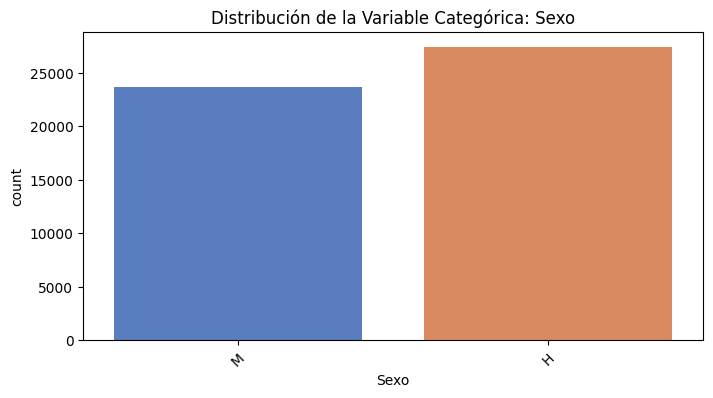

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


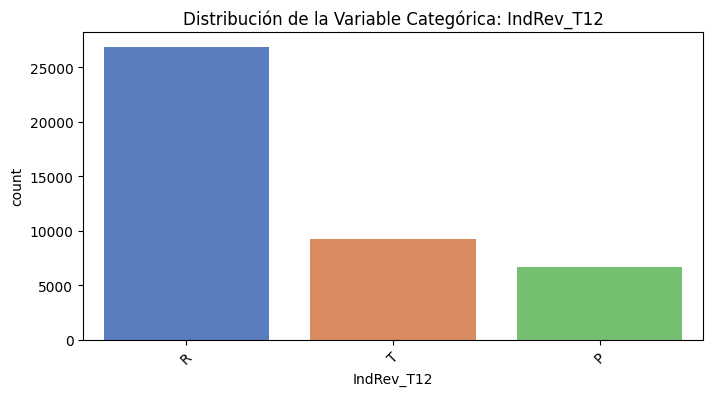

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


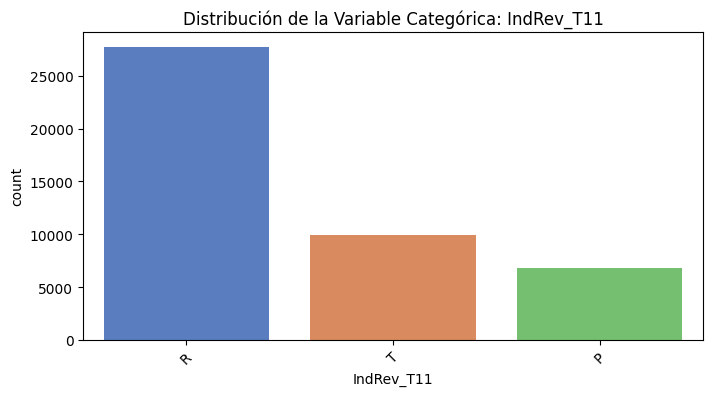

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


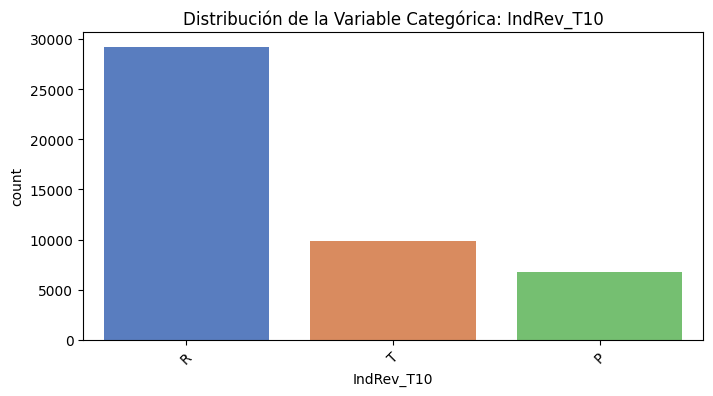

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


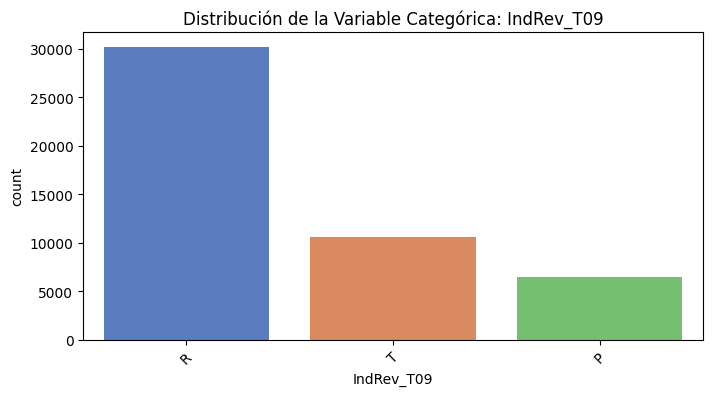

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


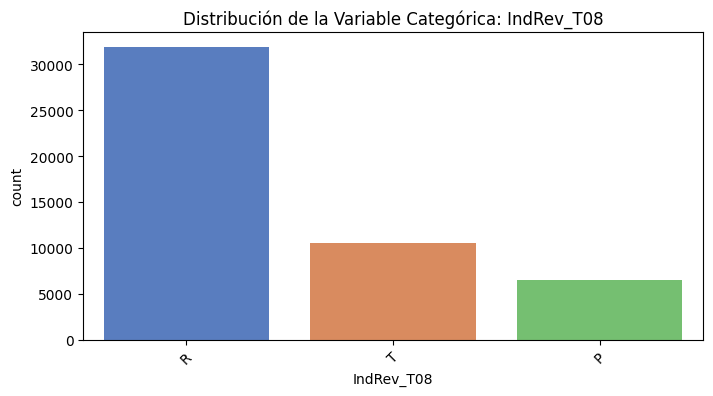

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


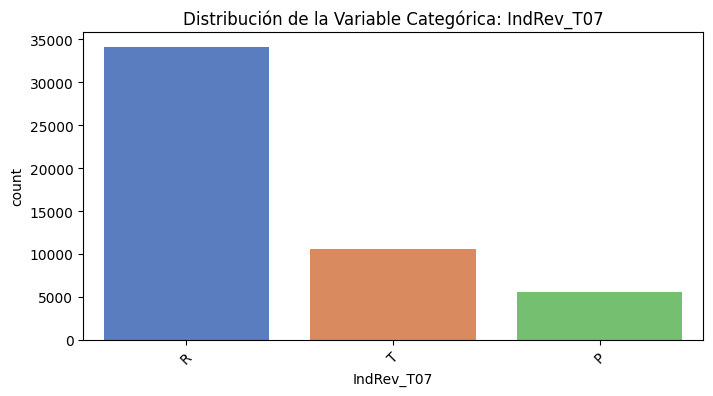

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


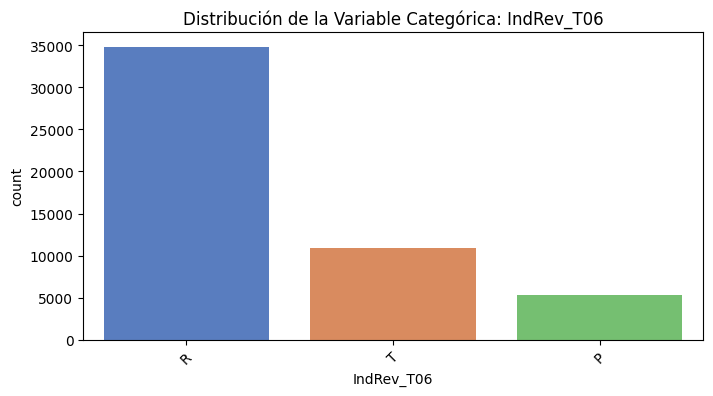

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


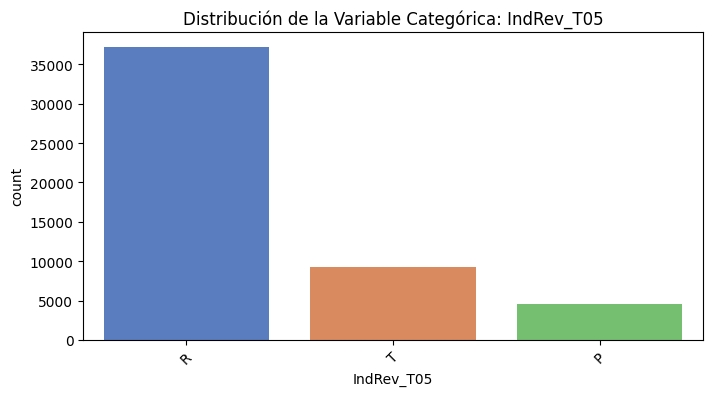

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


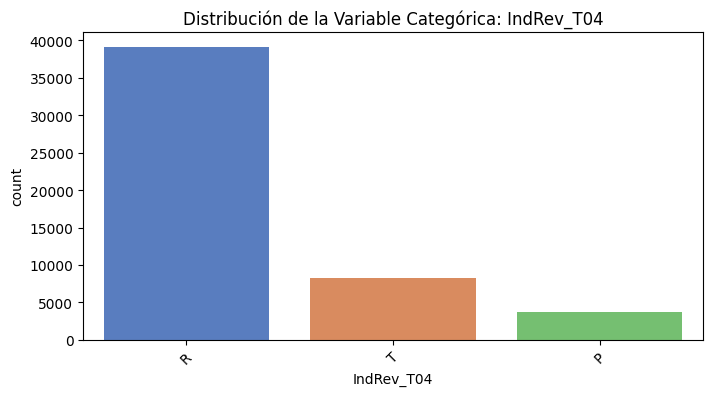

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


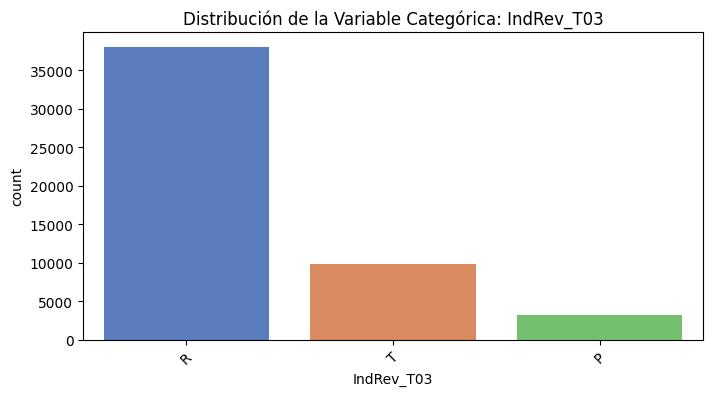

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


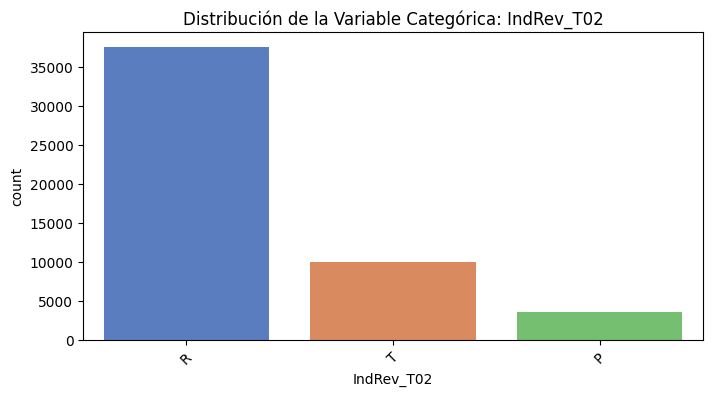

C:\Users\nicol\AppData\Local\Temp\ipykernel_10508\2954944478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='muted')


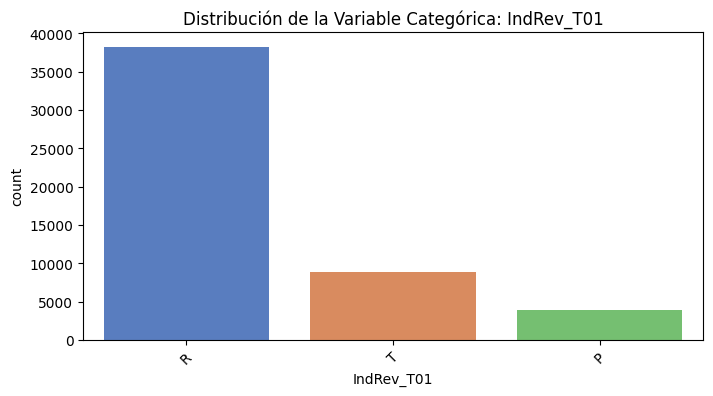

In [14]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='muted')
    plt.title(f'Distribución de la Variable Categórica: {col}')
    plt.xticks(rotation=45)
    plt.show()


##### Análisis de correlación entre variables numéricas

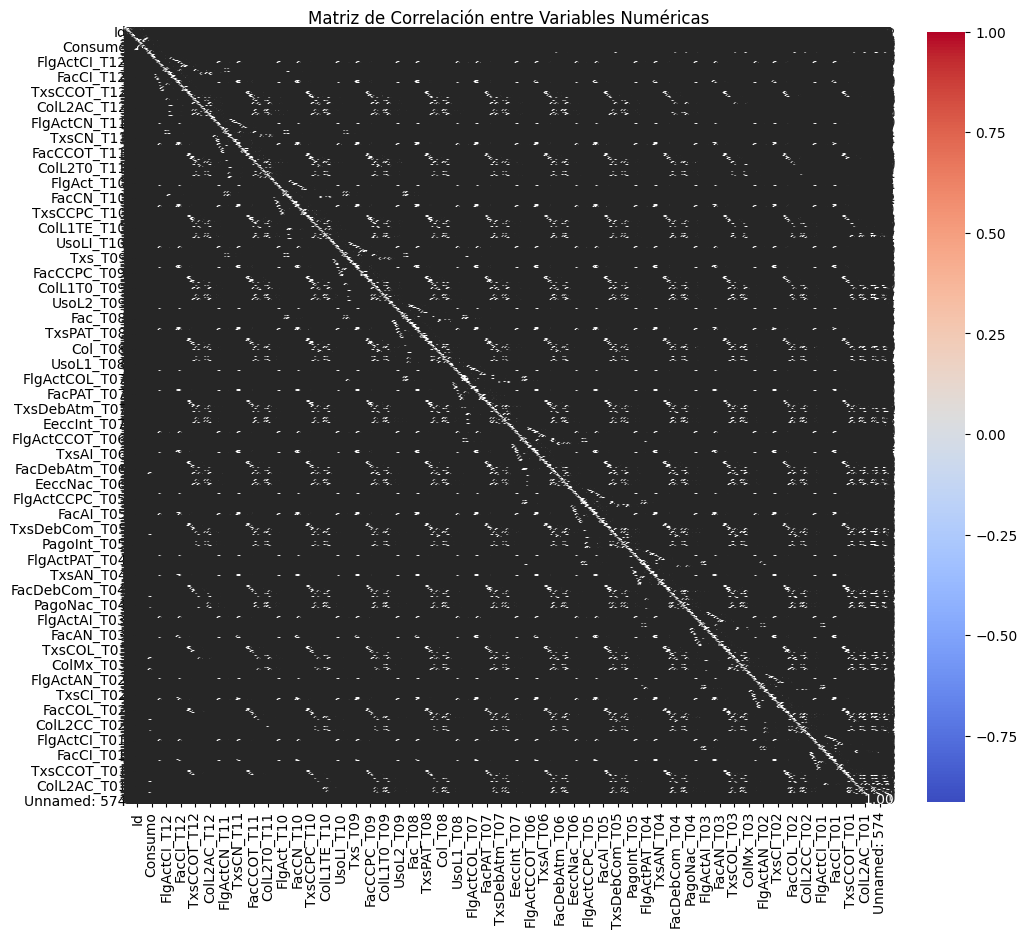

In [11]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

##### Visualización de relaciones entre variables

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Renta', y='Edad', hue='Sexo')
plt.title('Relación entre Edad, Renta y Sexo')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sexo', y='Renta')
plt.title('Distribución de la Renta por Sexo')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Renta')
plt.title('Distribución de la Renta por Región')
plt.xticks(rotation=45)
plt.show()

#### Valores faltantes

In [5]:
# Calcular el número de valores faltantes por columna
missing_values = df.isnull().sum()

# Iterar sobre los ítems de missing_values para imprimir solo aquellos con valores faltantes

print('Columnas con valores faltantes')
print('------------------------------')
for column, count in missing_values.items():
    if count > 0:
        print(f"-{column}: {count} valores faltantes")

Columnas con valores faltantes
------------------------------
-Sexo: 1 valores faltantes
-Region: 53 valores faltantes
-Renta: 13365 valores faltantes
-CambioPin: 19388 valores faltantes
-FlgAct_T12: 8251 valores faltantes
-FlgActCN_T12: 8251 valores faltantes
-FlgActCI_T12: 8251 valores faltantes
-FlgActAN_T12: 8251 valores faltantes
-FlgActAI_T12: 8251 valores faltantes
-FlgActPAT_T12: 8251 valores faltantes
-FlgActCCPC_T12: 8251 valores faltantes
-FlgActCCOT_T12: 8251 valores faltantes
-FlgActCOL_T12: 8251 valores faltantes
-Fac_T12: 8251 valores faltantes
-Txs_T12: 8251 valores faltantes
-FacCN_T12: 8251 valores faltantes
-TxsCN_T12: 8251 valores faltantes
-FacCI_T12: 8251 valores faltantes
-TxsCI_T12: 8251 valores faltantes
-FacAN_T12: 8251 valores faltantes
-TxsAN_T12: 8251 valores faltantes
-FacAI_T12: 8251 valores faltantes
-TxsAI_T12: 8251 valores faltantes
-FacPAT_T12: 8251 valores faltantes
-TxsPAT_T12: 8251 valores faltantes
-FacCCPC_T12: 8251 valores faltantes
-TxsCCPC_T12

#### Outliers

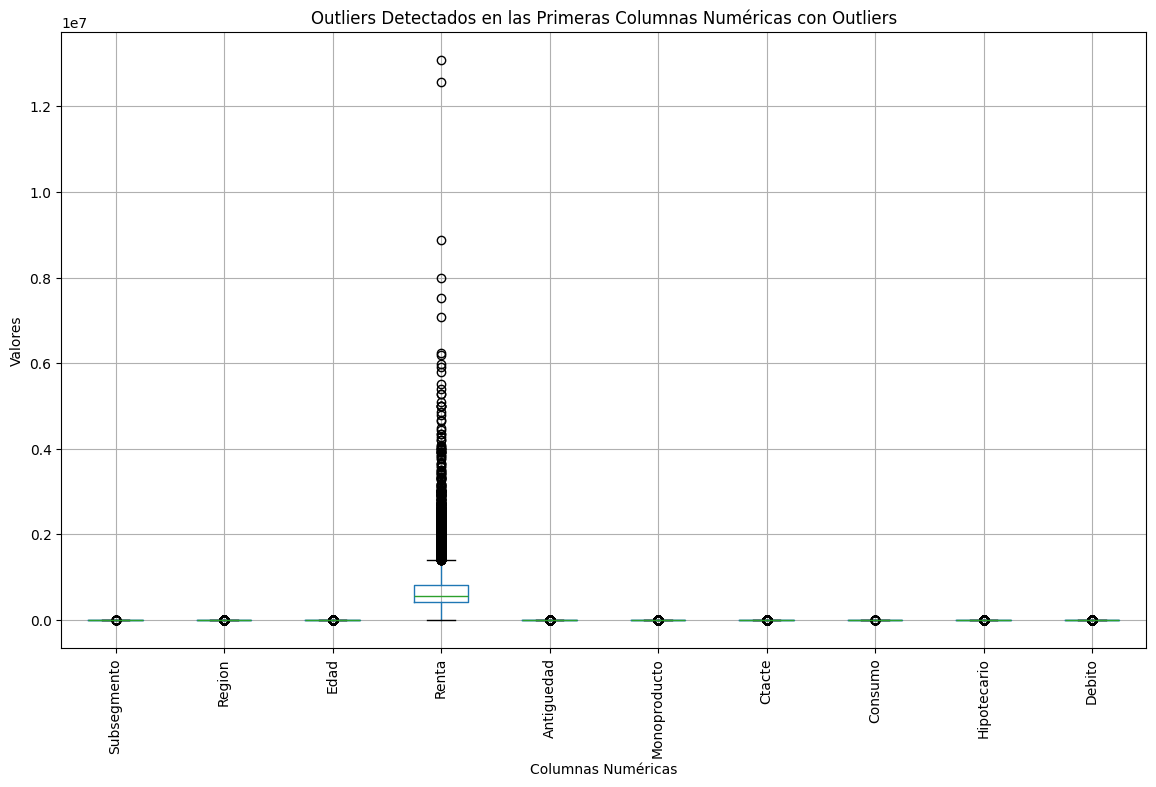

Outliers detectados en las primeras columnas con outliers:
       Subsegmento  Region  Edad     Renta  Antiguedad  Monoproducto  Ctacte  \
0              160    13.0    43       NaN         130             0       1   
1              160    13.0    46  143640.0          69             0       1   
2              170    13.0    45  929106.0          24             0       1   
3              151    13.0    46  172447.0         134             1       0   
4              170    13.0    46  805250.0         116             0       1   
...            ...     ...   ...       ...         ...           ...     ...   
51119          160    13.0    51  364978.0          57             0       1   
51120          170    13.0    51  625376.0          39             0       1   
51121          160    13.0    47  806220.0         153             0       1   
51122          160    13.0    47       NaN          11             0       1   
51123          170    13.0    51  840878.0          75       

In [14]:
# Re-identificar columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers: fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Filtrar las filas que contienen outliers
df_outliers = df[numerical_columns][outliers.any(axis=1)]

# Mostrar los gráficos de los outliers de manera clara para las primeras columnas con outliers detectados
columns_with_outliers = outliers.sum()[outliers.sum() > 0].index.tolist()[:10]  # Seleccionar las primeras 10 columnas con outliers

plt.figure(figsize=(14, 8))
df_outliers[columns_with_outliers].boxplot(rot=90)
plt.title('Outliers Detectados en las Primeras Columnas Numéricas con Outliers')
plt.xlabel('Columnas Numéricas')
plt.ylabel('Valores')
plt.show()

# Mostrar los datos de los outliers en pantalla
print("Outliers detectados en las primeras columnas con outliers:")
print(df_outliers[columns_with_outliers])

## Fase 3: Data Preparation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

#### Manejo de valores faltantes

Motivos:

Elegí imputar los valores faltantes numéricos con la mediana porque la mediana es menos sensible a los outliers que la media. Este enfoque es ideal cuando hay datos atípicos en las columnas numéricas.
Para las variables categóricas, utilicé la moda (valor más frecuente) para imputar los valores faltantes. La moda es una buena opción cuando los valores categóricos no tienen un orden intrínseco y queremos conservar la distribución de los datos existentes.

Descubrimientos y Patrones:

Observamos que algunas columnas tenían una cantidad significativa de valores faltantes, lo que sugiere que ciertos atributos no se registraron consistentemente en todas las muestras.
Las variables categóricas tenían relativamente pocos valores faltantes, lo que facilitó su imputación utilizando la moda.

In [15]:
# Verificar la cantidad de valores faltantes en cada columna
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])

# Imputar valores faltantes o eliminarlos, dependiendo de la cantidad de valores faltantes
# Ejemplo: Imputar con la mediana para columnas numéricas
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Ejemplo: Imputar con el valor más frecuente (moda) para columnas categóricas
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


Valores faltantes por columna:
Sexo                1
Region             53
Renta           13365
CambioPin       19388
FlgAct_T12       8251
                ...  
UsoL1_T02          12
UsoL2_T02          12
UsoLI_T02          12
IndRev_T02         12
Unnamed: 574    51124
Length: 511, dtype: int64


#### Codificación de Variables Categóricas


Motivos:

Utilicé One-Hot Encoding porque esta técnica no asume ningún orden en los datos categóricos y crea columnas binarias que representan la presencia o ausencia de una categoría. Esto es particularmente útil cuando las variables categóricas son nominales (sin orden) y tienen relativamente pocas categorías.

Descubrimientos y Patrones:

Al aplicar One-Hot Encoding, notamos un aumento significativo en el número de columnas. Esto sugiere que algunas variables categóricas tenían muchas categorías posibles. Aunque esto incrementa la dimensionalidad de los datos, proporciona una representación precisa de las características categóricas.
Las variables categóricas codificadas revelaron que ciertas categorías son mucho más frecuentes que otras, lo que puede ser útil para detectar patrones o segmentos dominantes en el análisis posterior.

In [16]:
# Codificar variables categóricas usando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("DataFrame después de codificación categórica:")
print(df_encoded.head())


DataFrame después de codificación categórica:
   Id  Subsegmento  Region  Edad     Renta  Antiguedad  Internauta  Adicional  \
0   1          160    13.0    43  567012.0         130           1          1   
1   2          160    13.0    46  143640.0          69           1          0   
2   3          170    13.0    45  929106.0          24           1          1   
3   4          151    13.0    46  172447.0         134           0          1   
4   5          170    13.0    46  805250.0         116           0          1   

   Dualidad  Monoproducto  ...  IndRev_T05_R  IndRev_T05_T  IndRev_T04_R  \
0         0             0  ...          True         False          True   
1         0             0  ...          True         False          True   
2         0             0  ...         False          True         False   
3         0             1  ...          True         False          True   
4         1             0  ...         False          True         False   

   IndRev_

#### Normalización de Datos Numéricos


Motivos:

Utilicé la técnica de StandardScaler, que transforma los datos para tener una media de 0 y una desviación estándar de 1. Esta técnica es adecuada cuando se quiere preservar la forma de la distribución de los datos, lo cual es crucial para modelos que suponen que los datos son normalmente distribuidos.

Descubrimientos y Patrones:

Tras la estandarización, observamos que los datos numéricos se concentran en torno a la media (0) con una desviación estándar de 1, lo que indica que están en una escala comparable.
Algunos atributos, especialmente aquellos con outliers, tienen una dispersión mucho mayor que otros, lo que sugiere que hay variabilidad significativa en ciertas características. Esto puede ser relevante para modelos que se enfocan en identificar patrones de alta variabilidad.

In [19]:
# Estandarizar datos numéricos
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

print("DataFrame después de la estandarización:")
print(df_encoded.head())


c:\Users\nicol\Desktop\Machine Lerning\env\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\nicol\Desktop\Machine Lerning\env\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\nicol\Desktop\Machine Lerning\env\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


DataFrame después de la estandarización:
         Id  Subsegmento    Region      Edad     Renta  Antiguedad  \
0 -1.732017    -0.752290  0.639671  0.323032 -0.200283    2.553917   
1 -1.731949    -0.752290  0.639671  0.548555 -1.395385    0.843902   
2 -1.731881    -0.410717  0.639671  0.473381  0.821842   -0.417584   
3 -1.731814    -1.059706  0.639671  0.548555 -1.314068    2.666049   
4 -1.731746    -0.410717  0.639671  0.548555  0.472219    2.161455   

   Internauta  Adicional  Dualidad  Monoproducto  ...  IndRev_T05_R  \
0    0.679384   1.703963 -0.785122     -0.259607  ...          True   
1    0.679384  -0.586867 -0.785122     -0.259607  ...          True   
2    0.679384   1.703963 -0.785122     -0.259607  ...         False   
3   -1.471922   1.703963 -0.785122      3.851970  ...          True   
4   -1.471922   1.703963  1.273688     -0.259607  ...         False   

   IndRev_T05_T  IndRev_T04_R  IndRev_T04_T  IndRev_T03_R  IndRev_T03_T  \
0         False          True       

#### Manejo de Outliers

Motivos:

Opté por imputar los outliers para preservar toda la información sin eliminar registros completos, lo que evita perder datos valiosos, y al mismo tiempo reducir la influencia de los valores extremos, minimizando así el sesgo que los outliers podrían causar en modelos sensibles. Esta estrategia también permite mantener la varianza y la distribución original de los datos, asegurando que sigan representando correctamente la población, y mejora la adaptabilidad del conjunto de datos a múltiples algoritmos de machine learning, logrando una mayor precisión y estabilidad en los resultados. En resumen, la imputación de outliers equilibra la integridad del conjunto de datos con la necesidad de tener un análisis robusto y fiable.

In [22]:
# Re-identificar columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers: fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Imputar outliers: Reemplazar con el límite inferior o superior del IQR
for column in numerical_columns:
    df[column] = df[column].mask(df[column] < lower_bound[column], lower_bound[column])
    df[column] = df[column].mask(df[column] > upper_bound[column], upper_bound[column])

print("DataFrame después de la imputación de outliers:")
df.head()

DataFrame después de la imputación de outliers:


,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,567012.0,114,1,1,0,...,33000,0.0,541973.5,0.0,542975.0,15080.000,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,222500,0.0,214592.0,0.0,214592.0,83596.000,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0.000,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,114,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591.000,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,114,0,1,1,...,222500,0.0,249562.0,0.0,75339.0,255255.625,0.0,R,0,NaN


## Fase 4: Modeling

### Aprendizaje Supervisado - Regresión

#### 1. Regresión Lineal Simple

**Explicación del Modelo 1: Regresión Lineal Simple:**

- Objetivo: Predecir la Renta del cliente en función de variables como Edad, Subsegmento, Region y TC (número de tarjetas de crédito).

- Entrenamiento: Dividimos el conjunto de datos en entrenamiento y prueba, luego entrenamos el modelo para ajustar una línea que minimice el error cuadrático medio entre las predicciones y los valores reales de Renta.

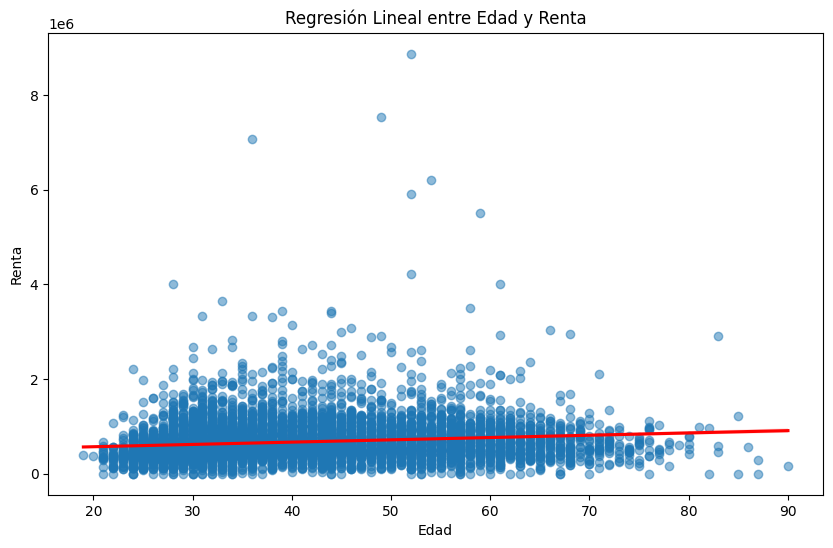

Mean Squared Error (MSE): 171965691787.03876
R^2 Score: 0.021581761663100996


In [32]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables predictoras y la variable objetivo
X = df[['Edad', 'Subsegmento', 'Region', 'TC']].copy()  # Variables predictoras
y = df['Renta'].copy()  # Variable objetivo

# Asegurarse de que todos los datos sean numéricos y eliminar valores no numéricos o nulos
X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = pd.to_numeric(y, errors='coerce').dropna()

# Mantener solo las filas donde tanto X como y tengan datos válidos
X, y = X.align(y, join='inner', axis=0)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Visualizar el modelo
# Gráfico de dispersión y línea de regresión entre 'Edad' y 'Renta'
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test['Edad'], y=y_test, line_kws={"color": "red"}, scatter_kws={"alpha":0.5})
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.title('Regresión Lineal entre Edad y Renta')
plt.show()




#### 2. Random Forest

**Explicación del Modelo 2: Random Forest:**

- Objetivo: Igual que en el modelo de regresión lineal, el objetivo es predecir la Renta del cliente utilizando las mismas variables predictoras (Edad, Subsegmento, Region, y TC).

- Modelo: Un Random Forest Regressor es un modelo basado en múltiples árboles de decisión. Cada árbol en el bosque predice la Renta de forma independiente, y el modelo final toma el promedio de estas predicciones.

In [27]:
# Importar librerías necesarias
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE) - Random Forest: {mse_rf}")
print(f"R^2 Score - Random Forest: {r2_rf}")

Mean Squared Error (MSE) - Random Forest: 0.09817846360360163
R^2 Score - Random Forest: 0.5859855976768057


### Aprendizaje Supervisado - Clasificación



#### 1. Regresión Logística

- Objetivo: Predecir si un cliente tiene una o más tarjetas de crédito (Dualidad) en función de variables como Edad, Subsegmento, Region, y TC.

- Modelo: La Regresión Logística es un modelo lineal que calcula la probabilidad de cada clase (1 o 0) y clasifica el cliente en la clase más probable.

In [14]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Seleccionar variables predictoras y la variable objetivo
X = df[['Edad', 'Subsegmento', 'Region', 'TC']].copy()  # Variables predictoras
y = df['Dualidad'].copy()  # Variable objetivo (1 si tiene 2 o más tarjetas, 0 si tiene una sola)

# Eliminar valores nulos en X y y
X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = pd.to_numeric(y, errors='coerce').dropna()

# Mantener solo las filas donde tanto X como y tienen datos válidos
X, y = X.align(y, join='inner', axis=0)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=100)
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_logistic = logistic_model.predict(X_test)



Accuracy - Regresión Logística: 0.8543318649045522
Classification Report - Regresión Logística:
               precision    recall  f1-score   support

           0       0.92      0.83      0.88      6266
           1       0.77      0.89      0.83      3949

    accuracy                           0.85     10215
   macro avg       0.85      0.86      0.85     10215
weighted avg       0.86      0.85      0.86     10215

Confusion Matrix:
 [[5212 1054]
 [ 434 3515]]


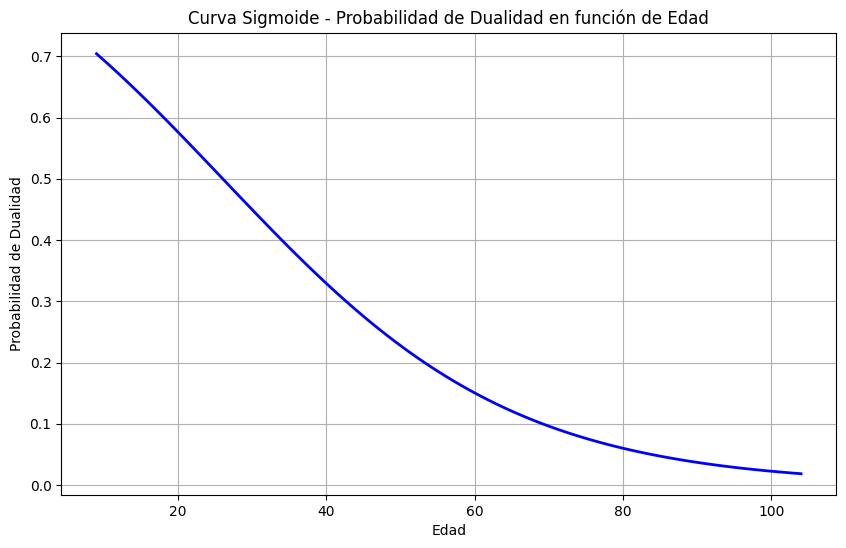

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar una variable predictora principal (en este caso, 'Edad')
variable = 'Edad'

# Generar un rango de valores para la variable seleccionada ('Edad')
valores_variable = np.linspace(X[variable].min(), X[variable].max(), 100)
X_sigmoide = pd.DataFrame({
    variable: valores_variable, 
    'Subsegmento': X['Subsegmento'].mean(),  # Valor promedio para 'Subsegmento'
    'Region': X['Region'].mean(),            # Valor promedio para 'Region'
    'TC': X['TC'].mean()                     # Valor promedio para 'TC'
})

# Predecir probabilidades para la clase positiva (Dualidad = 1) usando la variable seleccionada
probabilidades = logistic_model.predict_proba(X_sigmoide)[:, 1]

# Graficar la curva sigmoide
plt.figure(figsize=(10, 6))
plt.plot(valores_variable, probabilidades, color='blue', linewidth=2)
plt.xlabel(variable)
plt.ylabel('Probabilidad de Dualidad')
plt.title(f'Curva Sigmoide - Probabilidad de Dualidad en función de {variable}')
plt.grid(True)
plt.show()


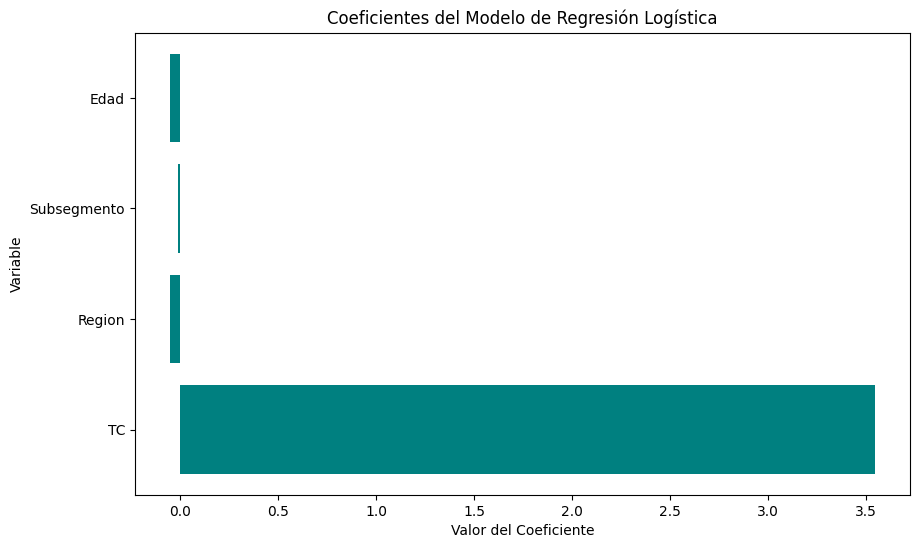

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': logistic_model.coef_[0]
})

# Visualizar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coeficientes['Variable'], coeficientes['Coeficiente'], color='teal')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variable')
plt.title('Coeficientes del Modelo de Regresión Logística')
plt.gca().invert_yaxis()
plt.show()


#### 2. K-Nearest Neighbors (KNN)

- Objetivo: Igual que en el modelo anterior, queremos predecir la Dualidad del cliente.

- Modelo: El modelo de K-Nearest Neighbors clasifica al cliente en función de las clases de sus vecinos más cercanos (en este caso, los 5 más cercanos). Es un modelo no lineal y funciona bien cuando las clases tienen límites complejos.

In [18]:
# Importar librerías necesarias
from sklearn.neighbors import KNeighborsClassifier

# Crear y entrenar el modelo de K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test)

# Evaluación del modelo
# accuracy_knn = accuracy_score(y_test, y_pred_knn)
# print(f"Accuracy - KNN: {accuracy_knn}")
# print("Classification Report - KNN:\n", classification_report(y_test, y_pred_knn))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Accuracy - KNN: 0.8405286343612335
Classification Report - KNN:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      6266
           1       0.77      0.83      0.80      3949

    accuracy                           0.84     10215
   macro avg       0.83      0.84      0.83     10215
weighted avg       0.84      0.84      0.84     10215

Confusion Matrix:
 [[5315  951]
 [ 678 3271]]


#### 3. Árbol de Decisión

- Objetivo: Predecir la Dualidad del cliente.

- Modelo: Un Árbol de Decisión clasifica a los clientes siguiendo reglas de decisión en cada nodo, basándose en el valor de las características predictoras. Es un modelo interpretativo y fácil de visualizar.

In [37]:
# Importar librerías necesarias
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Evaluación del modelo
# accuracy_tree = accuracy_score(y_test, y_pred_tree)
# print(f"Accuracy - Árbol de Decisión: {accuracy_tree}")
# print("Classification Report - Árbol de Decisión:\n", classification_report(y_test, y_pred_tree))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


MemoryError: could not allocate 1787756544 bytes

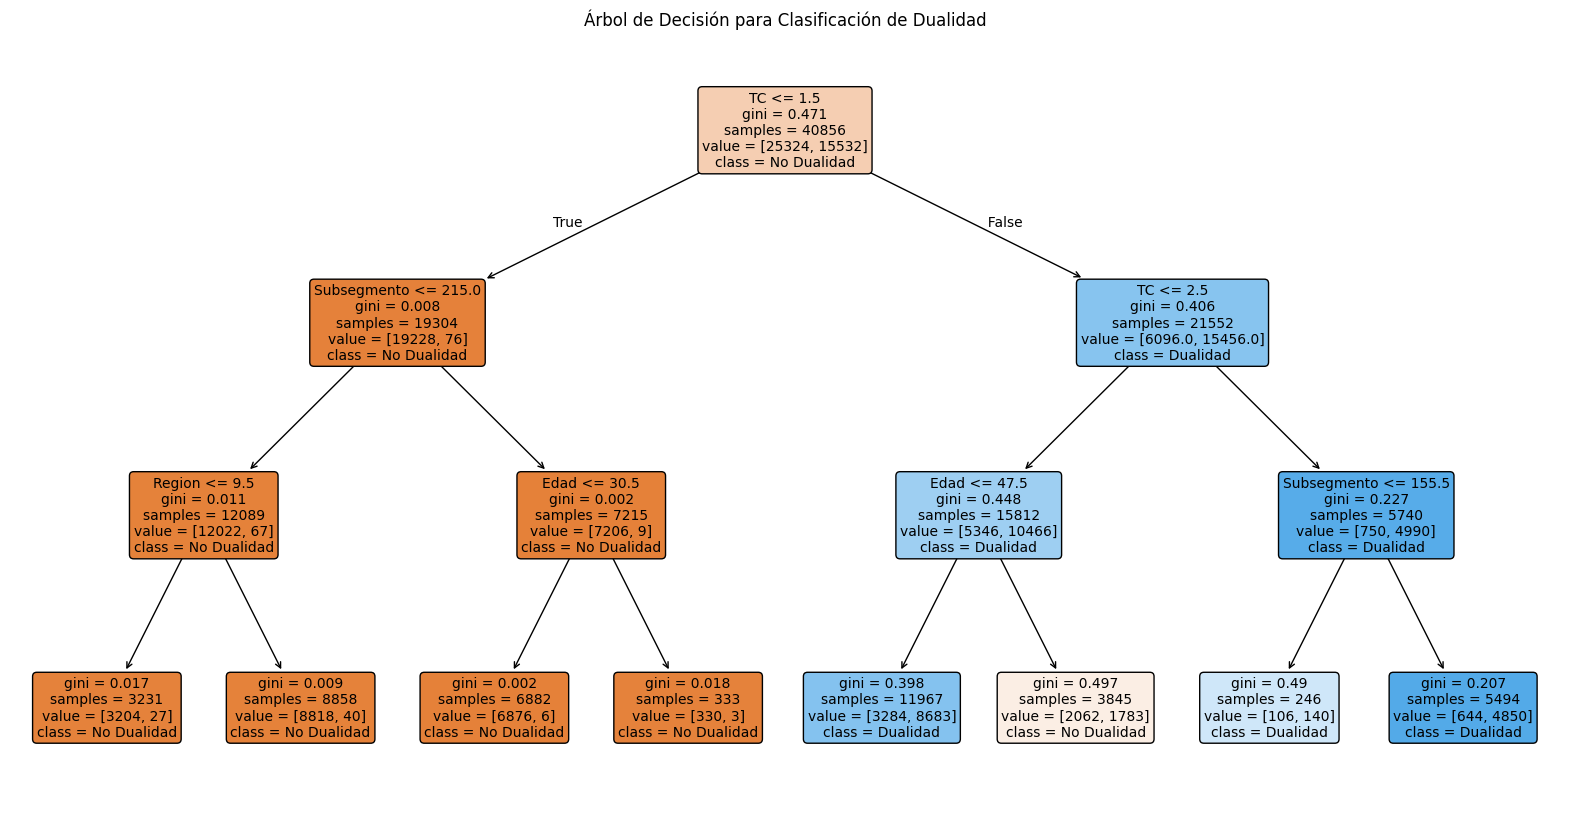

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Crear y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limitar profundidad para claridad
tree_model.fit(X_train[['Edad', 'Subsegmento', 'Region', 'TC']], y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree_model, 
          feature_names=['Edad', 'Subsegmento', 'Region', 'TC'], 
          class_names=['No Dualidad', 'Dualidad'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Árbol de Decisión para Clasificación de Dualidad")
plt.show()


#### 4. Nose

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que y_train e y_test tienen valores discretos (0 y 1)
# Si ya están en formato binario (como 0 o 1), este paso no cambiará nada
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Crear y entrenar el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Evaluación del modelo
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy - Gradient Boosting: {accuracy_gb}")
print("Classification Report - Gradient Boosting:\n", classification_report(y_test, y_pred_gb))


MemoryError: Unable to allocate 6.13 GiB for an array with shape (30183, 27279) and data type float64

### Aprendizaje NO Supervisado - Clustering



In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de regresión de datos orientado al caso entregado

## Fase 5: Evaluation

### Aprendizaje Supervisado - Regresión

#### 1. Regresión Lineal Simple

In [33]:
# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 171965691787.03876
R^2 Score: 0.021581761663100996


1. Mean Squared Error (MSE)
- Valor de MSE: 171,965,691,787.03876
    - El Mean Squared Error (MSE) mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales de la variable objetivo.
    - Un MSE alto, como en este caso, sugiere que las predicciones del modelo están, en promedio, bastante alejadas de los valores reales.
    - En términos generales, un MSE más bajo indica un mejor ajuste del modelo; sin embargo, la escala del MSE depende de la magnitud de los valores en la variable objetivo.
2. R² Score (Coeficiente de Determinación)
- Valor de R² Score: 0.0216
    - El R² Score mide el porcentaje de la varianza en la variable objetivo que el modelo es capaz de explicar. Un R² de 0.0216 indica que el modelo explica aproximadamente 2.16% de la variabilidad en los datos de la variable objetivo.
    - En este caso, un R² tan bajo significa que el modelo no está capturando casi ninguna relación entre la variable predictora y la variable objetivo.
    - Un R² cercano a cero sugiere que el modelo de regresión lineal no es adecuado para describir la relación entre las variables en estos datos; podría ser que no existe una relación lineal entre ellas o que otros factores no incluidos en el modelo están afectando significativamente la variable objetivo.

#### 2. Random Forest

In [28]:
print(f"Mean Squared Error (MSE) - Random Forest: {mse_rf}")
print(f"R^2 Score - Random Forest: {r2_rf}")

Mean Squared Error (MSE) - Random Forest: 0.09817846360360163
R^2 Score - Random Forest: 0.5859855976768057


1. Mean Squared Error (MSE)
Interpretación: El Mean Squared Error (MSE) mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales de Renta. Un MSE de 0.0981 significa que, en promedio, el error cuadrático es bastante bajo (pero el valor exacto de "bajo" depende de la escala de Renta en tus datos).
Conclusión: Un MSE más bajo indica un mejor ajuste del modelo, ya que los errores de predicción son menores. Sin embargo, este valor por sí solo no nos dice si el modelo es "bueno" o "malo"; necesitamos compararlo con otros modelos o métricas.
2. R² Score (Coeficiente de Determinación)
Interpretación: El R² Score mide el porcentaje de la varianza en Renta que el modelo es capaz de explicar. En este caso, un R² de 0.586 indica que el modelo de Random Forest explica aproximadamente el 58.6% de la variabilidad en los valores de Renta.
Conclusión: Un R² de 0.586 significa que el modelo captura una parte razonable de la variabilidad en Renta, pero aún queda un 41.4% de la variabilidad que el modelo no puede explicar. Esto sugiere que el modelo tiene un desempeño decente, pero no es perfecto; aún existen factores en los datos que el modelo no está capturando completamente.
3. Evaluación General
Interpretación Combinada: Con un MSE relativamente bajo y un R² de 0.586, el modelo tiene un desempeño aceptable, pero no completamente satisfactorio. El modelo de Random Forest ha logrado capturar algunos patrones significativos en los datos, pero es posible que esté limitado en su capacidad de explicar completamente Renta. Esto puede ser debido a la presencia de variabilidad en Renta que depende de factores que no están incluidos en las variables predictoras o que el modelo no está capturando adecuadamente las relaciones complejas en los datos.

### Aprendizaje Supervisado - Clasificación

#### 1. Regresión Logística

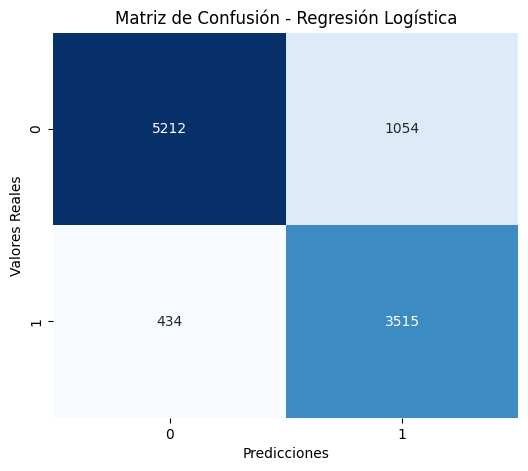

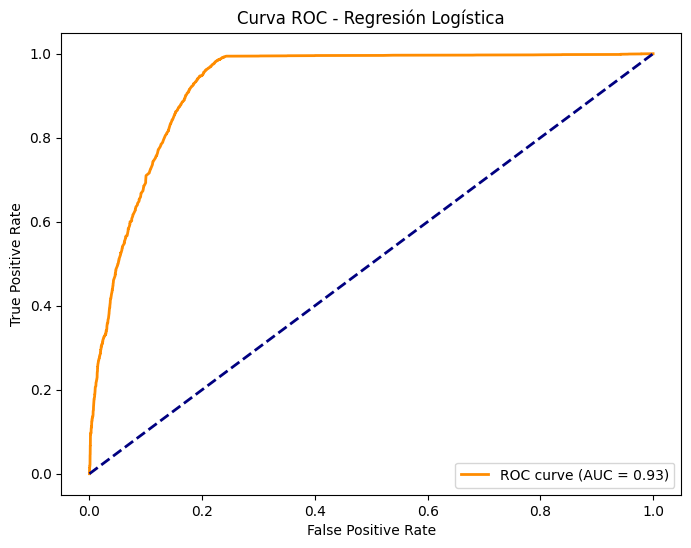

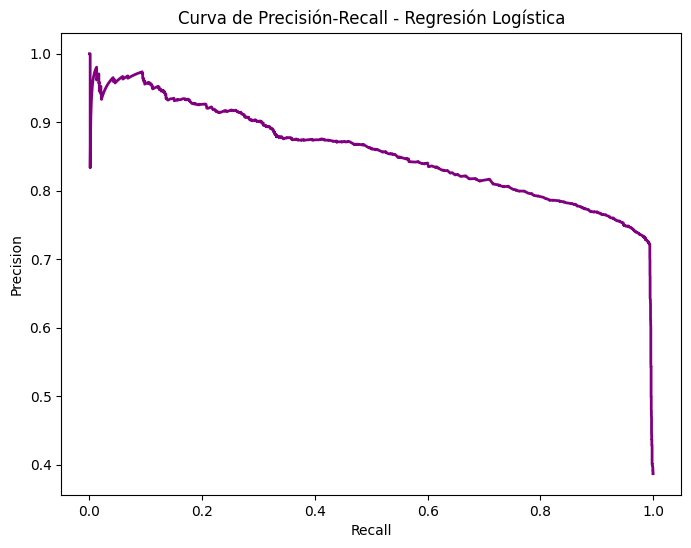

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.83      0.88      6266
           1       0.77      0.89      0.83      3949

    accuracy                           0.85     10215
   macro avg       0.85      0.86      0.85     10215
weighted avg       0.86      0.85      0.86     10215



In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report

# Realizar predicciones de probabilidad en el conjunto de prueba
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase 1 (Dualidad)

# 1. Matriz de Confusión
y_pred_logistic = logistic_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

# 2. Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logistic)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()

# 3. Curva de Precisión-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba_logistic)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall - Regresión Logística')
plt.show()

# Reporte de Clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_logistic))


1. Matriz de Confusión

La matriz de confusión muestra los aciertos y errores del modelo en términos de predicciones de las clases "0" (No Dualidad) y "1" (Dualidad):

- Verdaderos Negativos (TN): 5212 clientes que realmente no tienen dualidad y fueron clasificados correctamente como "No Dualidad".
- Falsos Positivos (FP): 1054 clientes que fueron clasificados como "Dualidad" pero en realidad no la tienen.
- Falsos Negativos (FN): 434 clientes que realmente tienen dualidad pero fueron clasificados incorrectamente como "No Dualidad".
- Verdaderos Positivos (TP): 3515 clientes que realmente tienen dualidad y fueron clasificados correctamente como "Dualidad".

Interpretación:

La matriz de confusión indica que el modelo tiene un buen rendimiento general, con más aciertos que errores en ambas clases. Sin embargo, hay un número considerable de falsos positivos (clientes clasificados incorrectamente como "Dualidad").

2. Curva ROC y AUC
La Curva ROC muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a diferentes umbrales, y el Área Bajo la Curva (AUC) es de 0.93.

Interpretación:

Un AUC de 0.93 es excelente, indicando que el modelo tiene una gran capacidad para distinguir entre las clases "Dualidad" y "No Dualidad". Esto significa que el modelo tiene un buen desempeño en la separación de clases, con una alta probabilidad de asignar correctamente la clase en situaciones de clasificación binaria.

3. Curva de Precisión-Recall
La Curva de Precisión-Recall muestra el trade-off entre precisión y recall a diferentes umbrales de decisión.

Interpretación:

La curva es bastante alta, lo que sugiere que el modelo mantiene una buena precisión y recall en casi todos los umbrales.
La precisión es especialmente alta en valores bajos de recall, lo que significa que el modelo es muy confiable en sus predicciones de "Dualidad" en algunos casos. Sin embargo, como el recall aumenta, la precisión disminuye, lo que es un comportamiento esperado en muchos modelos de clasificación binaria.

4. Reporte de Clasificación
El reporte de clasificación proporciona las métricas de precisión, recall y F1-score para cada clase, además de la precisión general del modelo.

Precisión para clase 0 (No Dualidad): 0.92. Esto significa que el modelo clasifica correctamente el 92% de las veces cuando predice "No Dualidad".
Recall para clase 0 (No Dualidad): 0.83. Esto indica que el modelo identifica correctamente el 83% de todos los casos de "No Dualidad".
Precisión para clase 1 (Dualidad): 0.77. Esto significa que el modelo clasifica correctamente el 77% de las veces cuando predice "Dualidad".
Recall para clase 1 (Dualidad): 0.89. Esto indica que el modelo identifica correctamente el 89% de todos los casos de "Dualidad".
F1-score:
Para "No Dualidad": 0.88
Para "Dualidad": 0.83
Precisión General (Accuracy): 0.85. Esto indica que el modelo clasifica correctamente el 85% de las veces.
Interpretación del Reporte de Clasificación:

El modelo tiene un buen equilibrio entre precisión y recall en ambas clases, lo cual es favorable.
La precisión y el recall altos para la clase "Dualidad" (1) son buenos signos de que el modelo puede detectar correctamente clientes con dualidad en un alto porcentaje de los casos.
El F1-score promedio ponderado de 0.86 sugiere un buen rendimiento general, especialmente útil cuando queremos equilibrar precisión y recall.

#### 2. K-Nearest Neighbors (KNN)

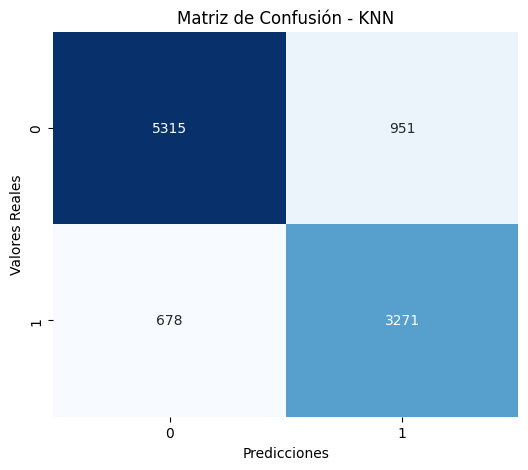

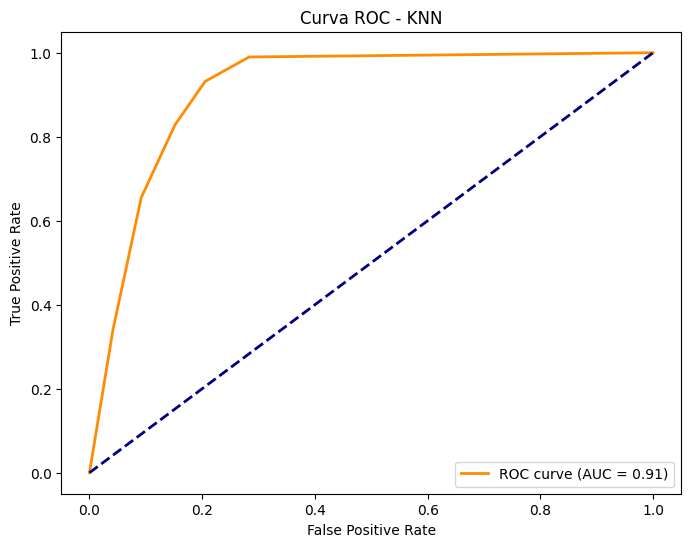

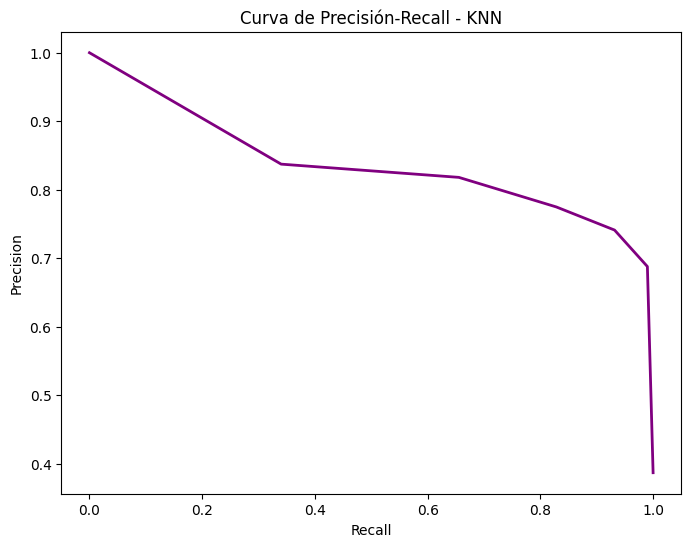

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report

# Calcular la matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - KNN')
plt.show()

# Calcular las probabilidades de la clase positiva para el conjunto de prueba
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# 2. Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - KNN')
plt.legend(loc="lower right")
plt.show()

# 3. Curva de Precisión-Recall
precision_knn, recall_knn, thresholds_pr = precision_recall_curve(y_test, y_proba_knn)

plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall - KNN')
plt.show()


Precisión General (Accuracy)

Precisión del modelo: 0.84
Esto significa que el modelo de KNN clasifica correctamente el 84% de los casos en el conjunto de prueba.
Interpretación:

Un accuracy de 0.84 sugiere que el modelo tiene un desempeño razonablemente bueno en la clasificación de "Dualidad" y "No Dualidad".
Sin embargo, hay margen para mejorar, ya que un 16% de los casos no son clasificados correctamente.
Reporte de Clasificación

El reporte de clasificación proporciona las métricas de precisión, recall y F1-score para cada clase, además de la precisión general del modelo.

Clase 0 (No Dualidad):

Precisión: 0.89. Esto significa que el modelo clasifica correctamente el 89% de las veces cuando predice "No Dualidad".
Recall: 0.85. Esto indica que el modelo identifica correctamente el 85% de todos los casos de "No Dualidad".
F1-score: 0.87.
Clase 1 (Dualidad):

Precisión: 0.77. Esto significa que el modelo clasifica correctamente el 77% de las veces cuando predice "Dualidad".
Recall: 0.83. Esto indica que el modelo identifica correctamente el 83% de todos los casos de "Dualidad".
F1-score: 0.80.
Precisión General (Accuracy): 0.84

Macro Promedio:

Precisión: 0.83
Recall: 0.84
F1-score: 0.83
Promedio Ponderado:

Precisión: 0.84
Recall: 0.84
F1-score: 0.84
Interpretación del Reporte de Clasificación:

El modelo muestra un buen equilibrio entre precisión y recall para ambas clases.
La precisión y el recall más bajos para la clase "Dualidad" (1) indican que el modelo tiene algunas dificultades para identificar correctamente todos los casos de "Dualidad".
El F1-score promedio ponderado de 0.84 indica un buen rendimiento general, siendo especialmente útil cuando se requiere un equilibrio entre precisión y recall.
Matriz de Confusión

La matriz de confusión muestra los aciertos y errores del modelo en términos de predicciones de las clases "0" (No Dualidad) y "1" (Dualidad):

Verdaderos Negativos (TN): 5315 clientes que realmente no tienen dualidad y fueron clasificados correctamente como "No Dualidad".

Falsos Positivos (FP): 951 clientes que fueron clasificados como "Dualidad" pero en realidad no la tienen.

Falsos Negativos (FN): 678 clientes que realmente tienen dualidad pero fueron clasificados incorrectamente como "No Dualidad".

Verdaderos Positivos (TP): 3271 clientes que realmente tienen dualidad y fueron clasificados correctamente como "Dualidad".

Interpretación de la Matriz de Confusión:

El modelo tiene un rendimiento decente, con más aciertos que errores en ambas clases.
Sin embargo, los 678 falsos negativos y los 951 falsos positivos sugieren que el modelo comete algunos errores al clasificar la "Dualidad".
Estos errores podrían ser aceptables dependiendo de la aplicación, pero podrían requerir ajustes en caso de que se necesite mejorar la clasificación.
Conclusión General

El modelo de K-Nearest Neighbors (KNN) tiene un rendimiento razonable en la clasificación de clientes con y sin "Dualidad":

Precisión general de 0.84 sugiere un buen ajuste, aunque con cierto margen para mejorar.
La matriz de confusión muestra que los errores están distribuidos entre falsos positivos y falsos negativos, lo que indica que el modelo podría beneficiarse de ajustes o de incorporar más características relevantes para mejorar su precisión.
En general, el modelo KNN proporciona un buen punto de partida para clasificar "Dualidad", pero se podrían considerar mejoras adicionales para aplicaciones más exigentes.

#### 3. Árbol de Decisión

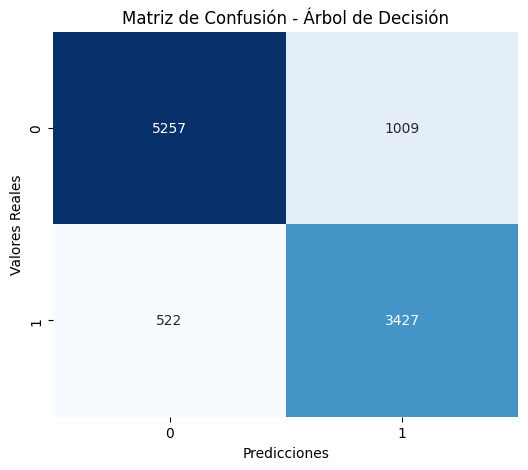

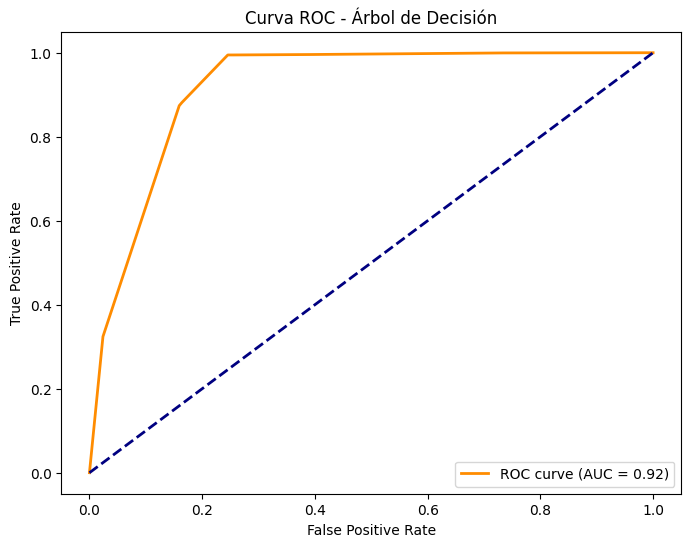

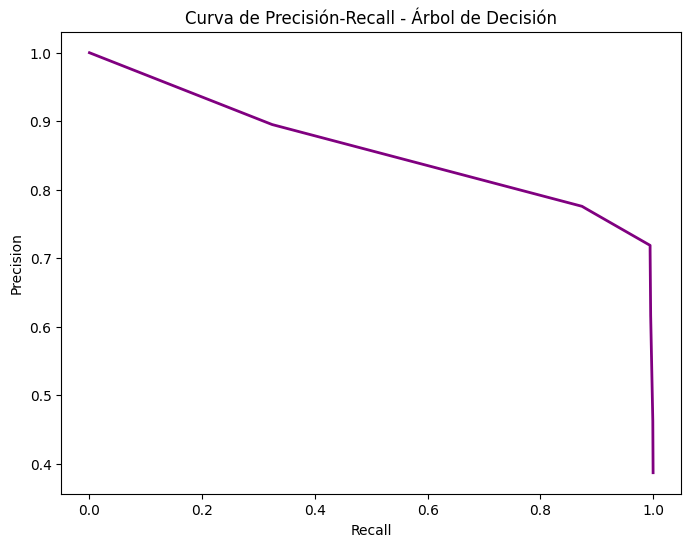

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report

# Calcular la matriz de confusión
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

# Calcular las probabilidades de la clase positiva para el conjunto de prueba
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]

# 2. Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_tree)
roc_auc_tree = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Árbol de Decisión')
plt.legend(loc="lower right")
plt.show()

# 3. Curva de Precisión-Recall
precision_tree, recall_tree, thresholds_pr = precision_recall_curve(y_test, y_proba_tree)

plt.figure(figsize=(8, 6))
plt.plot(recall_tree, precision_tree, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall - Árbol de Decisión')
plt.show()


1. Matriz de Confusión:

Muestra los aciertos y errores del modelo en términos de verdaderos negativos (TN), falsos positivos (FP), falsos negativos (FN), y verdaderos positivos (TP).
En este caso, la matriz de confusión indica:
- Verdaderos Negativos (TN): 5257 casos correctamente clasificados como "No Dualidad".
- Falsos Positivos (FP): 1009 casos incorrectamente clasificados como "Dualidad".
- Falsos Negativos (FN): 522 casos incorrectamente clasificados como "No Dualidad".
- Verdaderos Positivos (TP): 3427 casos correctamente clasificados como "Dualidad".

2. Curva ROC y AUC:

La Curva ROC muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a diferentes umbrales.
El Área Bajo la Curva (AUC) es un indicador de qué tan bien el modelo distingue entre las clases. Un AUC más cercano a 1 indica mejor desempeño.

Interpretación:

Un AUC alto sugiere que el modelo tiene una buena capacidad para separar ambas clases ("Dualidad" y "No Dualidad").

3. Curva de Precisión-Recall:

Esta curva muestra el trade-off entre precisión y recall a diferentes umbrales de decisión.
Es útil cuando se quiere evaluar el equilibrio entre precisión y recall, especialmente si hay una clase de interés prioritario.

Interpretación:

Un área grande bajo esta curva indica que el modelo mantiene un buen balance entre precisión y recall en diferentes umbrales, lo cual es positivo.

Interpretación General del Modelo de Árbol de Decisión

- Precisión General (Accuracy): El modelo tiene un accuracy de 0.85, lo cual indica un buen ajuste general en la clasificación de "Dualidad" y "No Dualidad".

Reporte de Clasificación:

- La precisión para la clase 0 (No Dualidad) es de 0.91, y para la clase 1 (Dualidad) es de 0.77, lo cual muestra un mejor rendimiento en la clase "No Dualidad".
- El recall es alto para ambas clases, lo cual indica que el modelo es efectivo en detectar tanto "Dualidad" como "No Dualidad".
- El F1-score promedio ponderado de 0.85 sugiere un buen equilibrio entre precisión y recall en ambas clases.

Matriz de Confusión:

Aunque el modelo clasifica correctamente una gran cantidad de casos en ambas clases, tiene 1009 falsos positivos y 522 falsos negativos, lo que indica margen de mejora.

Curva ROC y AUC:

Un AUC alto indica que el modelo tiene una buena capacidad para distinguir entre las clases.

Curva de Precisión-Recall:

Un área amplia bajo la curva sugiere que el modelo mantiene un buen balance entre precisión y recall, lo cual es favorable en problemas de clasificación binaria.

En conclusión, el Árbol de Decisión tiene un rendimiento robusto en la clasificación de "Dualidad", pero podría beneficiarse de ajustes adicionales para reducir los falsos positivos y mejorar su precisión en la clase "Dualidad".

#### 4. Nose

### Aprendizaje NO Supervisado - Clustering



In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Evaluar con las métricas que corresponda los mejores modelos, explicar cual es mejor para cada tarea y por qué

### Aprendizaje NO Supervisado - Clustering



In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Evaluar con las métricas que corresponda los mejores modelos, explicar cual es mejor para cada tarea y por qué

## Fase 6: Deployment

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar despliegue del modelo